In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import itertools

In [96]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [97]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount_retraite.csv', index_col=0)
df_test = pd.read_csv('datasets/SatisfactionClients/amazon_test1.csv', index_col=0)
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
46270,FR,1,Service de livraison déplorable : voici l'épisode 5,"14 janv. 2021Service de livraison déplorable : voici l'épisode 5Alors voici l'épisode 5: ce matin, jour même de la 4ème livraison, on m'appelle pour me dire que la machine à laver ne pourra pas être livrée car la marchandise n'est pas revenue à l'entrepôt, ils annulent donc la livraison et propose de la reprogrammée encore une fois!Vous êtes sérieux?? J'ai encore posé mon jour, j'ai prévenu l'artisan qui doit venir m'aider à brancher la machine4 lapins de suite !!!!!!!!!!!!!!!!!!!!!Alors à quand l'épisode 6?Alors, oui vous m'avez gentiment accordé un avoir du montant des frais de port, mais 1/ c'est d'une machine à laver dont j'ai besoin 2/ ce geste ne couvre pas la perte de salaire d'une 1/2 journée posée (encore !!!) pour rien3/ Un avoir c'est malin, puisqu'un remboursement m'aurait ...","['janv', 'service', 'livraison', 'déplorable', 'voici', 'épisode', 'alors', 'voici', 'épisode', 'matin', 'jour', 'ème', 'livraison', 'appelle', 'dire', 'machine', 'laver', 'pourra', 'tre', 'livrée', 'car', 'marchandise', 'revenue', 'entrep', 'annulent', 'donc', 'livraison', 'propose', 'reprogrammée', 'encore', 'fois', 'sérieux', 'encore', 'posé', 'jour', 'prévenu', 'artisan', 'doit', 'venir', 'aider', 'brancher', 'machine', 'lapins', 'suite', 'alors', 'quand', 'épisode', 'alors', 'oui', 'gentiment', 'accordé', 'avoir', 'montant', 'frais', 'port', 'machine', 'laver', 'dont', 'besoin', 'geste', 'couvre', 'perte', 'salaire', 'journée', 'posée', 'encore', 'rien', 'avoir', 'malin', 'puisqu', 'remboursement', 'permis', 'plus', 'avoir', 'recommander', 'chez', 'pitié', 'quelqu', 'décroche', 't...","['service', 'livraison', 'déplorable', 'voici', 'épisode']"
22569,FR,5,tres satisfaite de c discount,25 sept. 2021Sur invitationtres satisfaite de c discountDate de l'expérience: 25 septembre 2021,"['sept', 'invitationtres', 'satisfaite', 'discountdate', 'expérience', 'septembre']","['tres', 'satisfaite', 'discount']"
22918,FR,5,commande rapide,21 sept. 2021Sur invitationcommande rapideDate de l'expérience: 21 septembre 2021,"['sept', 'invitationcommande', 'rapidedate', 'expérience', 'septembre']","['commande', 'rapide']"


In [98]:
# séparation de la variable cible et des variables explicatives
X = df['Commentaire_filtre']
y = df['note']

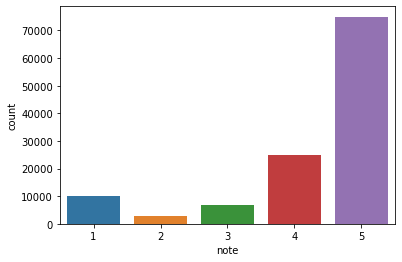

In [114]:
import seaborn as sns
sns.countplot(x='note', data=df);

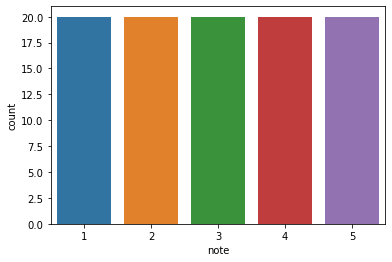

In [115]:
sns.countplot(x='note', data=df_test);

In [100]:
# séparation du jeu de données en un dataset d'entrainement et un dataset de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [101]:
# conversion des chaines de caratères en tokens numériques
# on ne prendra que les éléments répétés au moins 3 fois avec min_df=3
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3)
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [102]:
print(X_train.shape)
print(X_test.shape)
print(df_test.shape)

(96000, 14689)
(24000, 14689)
(100, 4)


In [112]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

br = BalancedRandomForestClassifier(n_estimators=10, max_depth=10)
br.fit(X_train, y_train)

y_pred_br = br.predict(X_test)

print(br.score(X_test, y_test), end='\n\n')

cr_br = classification_report(y_test, y_pred_br)
print(cr_br)

cm_br = pd.crosstab(y_test, y_pred_br, rownames=['données réelles'], colnames=['predictions'])
display(cm_br)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = br.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.389875

              precision    recall  f1-score   support

           1       0.53      0.70      0.60      2047
           2       0.11      0.14      0.12       559
           3       0.18      0.10      0.13      1392
           4       0.24      0.69      0.36      5095
           5       0.78      0.28      0.41     14907

    accuracy                           0.39     24000
   macro avg       0.37      0.38      0.33     24000
weighted avg       0.60      0.39      0.39     24000



predictions,1,2,3,4,5
données réelles,,,,,
1,1436,132,70,307,102
2,191,76,46,207,39
3,229,111,144,774,134
4,291,166,223,3530,885
5,555,231,299,9651,4171


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


predictions,1,2,3,4,5
données réelles,,,,,
1,19,0,0,1,0
2,15,2,0,1,2
3,12,1,1,4,2
4,13,1,1,2,3
5,8,6,0,1,5


predictions,1,2,3,4,5
données réelles,,,,,
1,0.95,0.00,0.00,0.05,0.00
2,0.75,0.10,0.00,0.05,0.10
3,0.60,0.05,0.05,0.20,0.10
4,0.65,0.05,0.05,0.10,0.15
5,0.40,0.30,0.00,0.05,0.25


les prédictions correctes sont supérieures à 50% pour 1 étoile(s) avec 95.0 %


In [105]:
br2 = BalancedRandomForestClassifier(n_estimators=10, max_depth=100)
br2.fit(X_train, y_train)

y_pred_br2 = br2.predict(X_test)

print(br2.score(X_test, y_test), end='\n\n')

cr_br2 = classification_report(y_test, y_pred_br2)
print(cr_br2)

cm_br2 = pd.crosstab(y_test, y_pred_br2, rownames=['données réelles'], colnames=['predictions'])
display(cm_br2)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = br2.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.501625

              precision    recall  f1-score   support

           1       0.63      0.61      0.62      2047
           2       0.09      0.26      0.13       559
           3       0.18      0.31      0.23      1392
           4       0.27      0.41      0.33      5095
           5       0.80      0.54      0.65     14907

    accuracy                           0.50     24000
   macro avg       0.39      0.43      0.39     24000
weighted avg       0.62      0.50      0.54     24000



C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


predictions,1,2,3,4,5
données réelles,,,,,
1,17,1,1,0,1
2,9,6,3,1,1
3,5,8,5,1,1
4,11,3,4,2,0
5,9,3,4,1,3


predictions,1,2,3,4,5
données réelles,,,,,
1,0.85,0.05,0.05,0.00,0.05
2,0.45,0.30,0.15,0.05,0.05
3,0.25,0.40,0.25,0.05,0.05
4,0.55,0.15,0.20,0.10,0.00
5,0.45,0.15,0.20,0.05,0.15


les prédictions correctes sont supérieures à 50% pour 1 étoile(s) avec 85.0 %


In [107]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(clf.score(X_test, y_test), end='\n\n')

cr = classification_report(y_test, y_pred)
print(cr)

cm = pd.crosstab(y_test, y_pred, rownames=['données réelles'], colnames=['predictions'])
display(cm)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = clf.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.6512916666666667

              precision    recall  f1-score   support

           1       0.84      0.36      0.51      2047
           2       0.00      0.00      0.00       559
           3       0.00      0.00      0.00      1392
           4       0.00      0.00      0.00      5095
           5       0.64      1.00      0.78     14907

    accuracy                           0.65     24000
   macro avg       0.30      0.27      0.26     24000
weighted avg       0.47      0.65      0.53     24000



C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t.fourtouill\Anaconda3\li

predictions,1,5
données réelles,,
1,7,13
2,6,14
3,3,17
4,3,17
5,1,19


predictions,1,5
données réelles,,
1,0.35,0.65
2,0.30,0.70
3,0.15,0.85
4,0.15,0.85
5,0.05,0.95


les prédictions correctes sont supérieures à 50% pour 5 étoile(s) avec 95.0 %


In [108]:
[(estimator.get_depth(), estimator.tree_.max_depth, estimator.max_depth) for estimator in clf.estimators_]

[(10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10),
 (10, 10, 10)]

In [109]:
[estimator.get_n_leaves() for estimator in clf.estimators_]

[77, 192, 107, 147, 155, 126, 121, 109, 170, 130]

In [110]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=100)

clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

print(clf2.score(X_test, y_test), end='\n\n')

cr2 = classification_report(y_test, y_pred2)
print(cr2)

cm2 = pd.crosstab(y_test, y_pred2, rownames=['données réelles'], colnames=['predictions'])
display(cm2)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = clf2.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.6865833333333333

              precision    recall  f1-score   support

           1       0.74      0.66      0.70      2047
           2       0.19      0.01      0.02       559
           3       0.32      0.06      0.10      1392
           4       0.45      0.08      0.14      5095
           5       0.70      0.98      0.82     14907

    accuracy                           0.69     24000
   macro avg       0.48      0.36      0.35     24000
weighted avg       0.61      0.69      0.60     24000



C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


predictions,1,3,4,5
données réelles,,,,
1,18,0,0,2
2,11,2,1,6
3,9,1,2,8
4,6,0,2,12
5,5,0,0,15


predictions,1,3,4,5
données réelles,,,,
1,0.90,0.00,0.00,0.10
2,0.55,0.10,0.05,0.30
3,0.45,0.05,0.10,0.40
4,0.30,0.00,0.10,0.60
5,0.25,0.00,0.00,0.75


les prédictions correctes sont supérieures à 50% pour 1 étoile(s) avec 90.0 %
les prédictions correctes sont supérieures à 50% pour 5 étoile(s) avec 75.0 %


In [111]:
clf3 = RandomForestClassifier()

clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

print(clf3.score(X_test, y_test), end='\n\n')

cr3 = classification_report(y_test, y_pred3)
print(cr3)

cm3 = pd.crosstab(y_test, y_pred3, rownames=['données réelles'], colnames=['predictions'])
display(cm3)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = clf3.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.687875

              precision    recall  f1-score   support

           1       0.73      0.73      0.73      2047
           2       0.11      0.01      0.01       559
           3       0.36      0.10      0.16      1392
           4       0.42      0.20      0.27      5095
           5       0.73      0.93      0.82     14907

    accuracy                           0.69     24000
   macro avg       0.47      0.39      0.40     24000
weighted avg       0.62      0.69      0.63     24000



C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


predictions,1,4,5
données réelles,,,
1,20,0,0
2,15,1,4
3,12,5,3
4,8,0,12
5,7,0,13


predictions,1,4,5
données réelles,,,
1,1.00,0.00,0.00
2,0.75,0.05,0.20
3,0.60,0.25,0.15
4,0.40,0.00,0.60
5,0.35,0.00,0.65


les prédictions correctes sont supérieures à 50% pour 1 étoile(s) avec 100.0 %
les prédictions correctes sont supérieures à 50% pour 5 étoile(s) avec 65.0 %


In [117]:
from joblib import dump
dump(clf3, 'datasets/SatisfactionClients/model_rf.jolib')

['datasets/SatisfactionClients/model_rf.jolib']